In [647]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from functions import gauss, crystalball, freedman, decay

Start by testing iminuit on the MC data to start to learn how it works

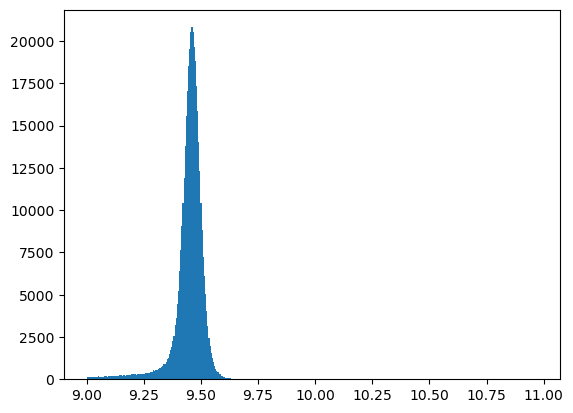

In [648]:
xmass = np.load('mc_anal/xmass_mc.npy')
count_mc, bin, patches = plt.hist(xmass, bins = 400)
bins_m = bin[1:] - (bin[1]-bin[0])/2
bins_mc = bins_m[(bins_m > 9.2) & (bins_m < 9.6)]
count_mc = count_mc[(bins_m > 9.2) & (bins_m < 9.6)]

In [649]:
def lsq(a, mu, sig):
    return np.sum((count_mc-gauss(bins_mc,a,mu,sig)) **2)

In [650]:
m = Minuit(lsq, a = 20000, mu = 9.45, sig = 0.03)
m.errordef = Minuit.LIKELIHOOD

In [651]:
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.011e+07                  │              Nfcn = 66               │
│ EDM = 7.49e-08 (Goal: 0.0001)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │20.15758e3 │ 0.00025e3 │            │            │         │         │       │
│ 1 │ mu   │ 9.4610225 │ 0.0000005 │            │            │         │         │       │
│ 2 │ sig  │35.8201e-3 │ 0.0005e-3 │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬───────────────────────────────┐
│     │         a        mu       sig │
├─────┼───────────────────────────────┤
│   a │    0.0608  2.67e-09 -7.83e-08 │
│  mu │  2.67e-09  2.45e-13 -1.08e-14 │
│ sig │ -7.83e-08 -1.08e-14  2.76e-13 │
└─────┴───────────────────────────────┘

In [652]:
a_fit = m.values[0]
mu_fit = m.values[1]
sig_fit = m.values[2]
print(a_fit, mu_fit, sig_fit)

20157.575032208773 9.461022452866755 0.03582012322719158


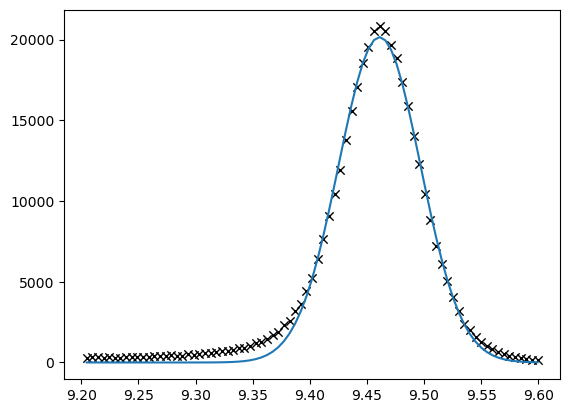

In [653]:
plt.plot(bins_mc, gauss(bins_mc, a_fit, mu_fit, sig_fit))
plt.scatter(bins_mc, count_mc, marker = 'x', lw=1, color = 'k')

In [654]:
def lsq_cb(alpha, n, mu, sig):
    return np.sum((count_mc-crystalball(bins_mc, alpha, n, mu, sig)) **2)


In [655]:
cb_mc = Minuit(lsq_cb, alpha = 1.9, n=0.9, mu = 9.46, sig = 0.033)
cb_mc.errordef = Minuit.LIKELIHOOD

In [656]:
cb_mc.migrad(iterate = 1000)
cb_mc.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3.289e+07                  │             Nfcn = 28205             │
│ EDM = 56.9 (Goal: 0.0001)        │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ ABOVE EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │APPROXIMATE│NOT pos. def.│   FORCED   │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ alpha │1.42045022 │0.00000004 │            │            │         │         │       │
│ 1 │ n     │899.997879e-3│0.000008e-3│            │            │         │         │       │
│ 2 │ mu    │ 9.4619347 │ 0.0000005 │            │            │         │         │       │
│ 3 │ sig   │33.9959e-3 │ 0.0005e-3 │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────┐
│       │     alpha         n        mu       sig │
├───────┼─────────────────────────────────────────┤
│ alpha │   1.4e-15   2.9e-16  -3.5e-16  3.98e-15 │
│     n │   2.9e-16  6.05e-17 -9.31e-17  1.06e-15 │
│    mu │  -3.5e-16 -9.31e-17  2.42e-13 -2.55e-14 │
│   sig │  3.98e-15  1.06e-15 -2.55e-14  2.96e-13 │
└───────┴─────────────────────────────────────────┘

for some reason it is not minimising, EDM is too high

EDM = Estimated distance from Minimum

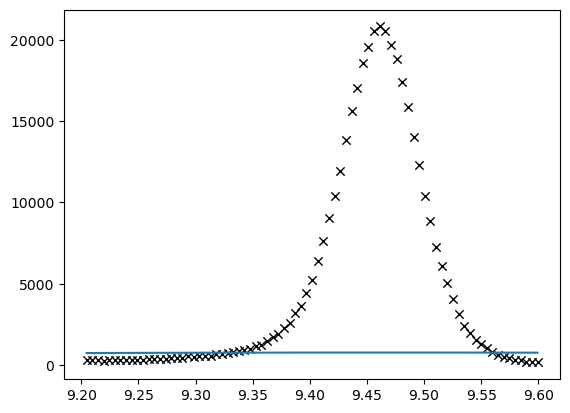

In [657]:
alpha_mc = cb_mc.values['alpha']
n_mc = cb_mc.values['n']
mu_mc = cb_mc.values['mu']
sig_mc = cb_mc.values['sig']

plt.plot(bins_mc, crystalball(bins_mc, alpha_mc, n_mc, mu_mc, n_mc))
plt.scatter(bins_mc, count_mc, marker = 'x', lw=1, color = 'k')
plt.show()

Now try using iminuit and the cb to fit the ups_small data

1384.0


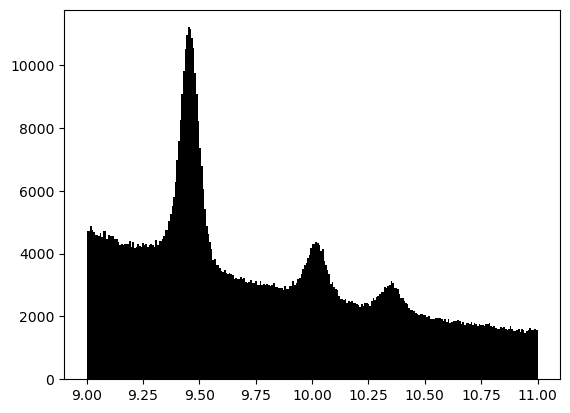

In [658]:
xmass_ups = np.load('ups_anal/xmass.npy')
 
Min = np.min(xmass_ups)
Max = np.max(xmass_ups)
_, n_bins = np.modf((Max-Min)/freedman(xmass))
print(n_bins)

count , bins_w, patches = plt.hist(xmass_ups, color = 'k', bins = int(0.2*n_bins), histtype= 'bar', range =(Min, Max), density=False )
bins = bins_w[1:] - (bins_w[1] - bins_w[0])/2

#histogram of the peaks from raw data
bins_1 = bins[(bins > 9.25) & (bins < 9.7)]
count_1 = count[(bins > 9.25) & (bins < 9.7)]

bins_2 = bins[(bins > 9.8) & (bins < 10.17)]
count_2 = count[(bins > 9.8) & (bins < 10.17)]

bins_3 = bins[(bins > 10.17) & (bins < 10.6)]
count_3 = count[(bins > 10.17) & (bins < 10.6)]

bins_back = np.concatenate((bins[(bins < 9.2) | (bins > 10.55)], bins[(bins > 9.7) & (bins < 9.8)]))
count_back= np.concatenate((count[(bins < 9.2) | (bins > 10.55)], count[(bins > 9.7) & (bins < 9.8)]))

In [659]:
def lsq_back(al,b):
    return np.sum((count_back-decay(bins_back,al,b)) **2)

In [660]:
m_dec = Minuit(lsq_back, al = 100000, b = 0.005)

In [661]:
m_dec.migrad()

/var/folders/_r/353nz1r53xxbm376n76kwspr0000gn/T/ipykernel_24359/945649017.py:1: IMinuitWarning: errordef not set, using 1 (appropriate for least-squares)
  m_dec.migrad()


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3.236e+05                  │              Nfcn = 315              │
│ EDM = 3.66e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ al   │  899.2e3  │   0.4e3   │            │            │         │         │       │
│ 1 │ b    │-581.75e-3 │  0.05e-3  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬───────────────────┐
│    │       al        b │
├────┼───────────────────┤
│ al │ 1.91e+05  -0.0222 │
│  b │  -0.0222 2.59e-09 │
└────┴───────────────────┘

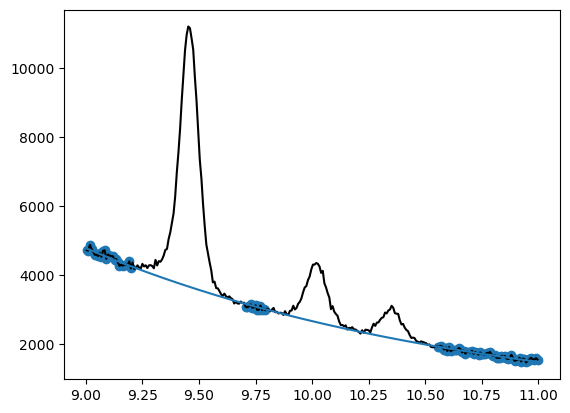

In [662]:
al_fit = m_dec.values['al']
b_fit = m_dec.values['b']
plt.plot(bins, count, color='k')
plt.plot(bins, decay(bins, al_fit, b_fit))
plt.scatter(bins_back, count_back)


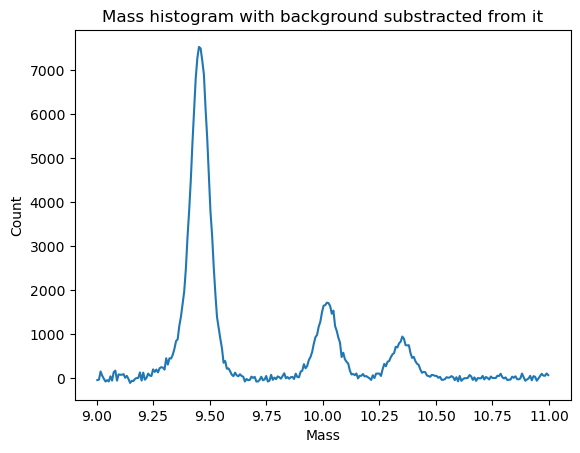

<Figure size 640x480 with 0 Axes>

In [663]:
count_1_clean = count_1 - decay(bins_1, al_fit, b_fit)
count_2_clean = count_2 - decay(bins_2, al_fit, b_fit)
count_3_clean = count_3 - decay(bins_3, al_fit, b_fit)

plt.plot(bins, count - decay(bins, al_fit, b_fit))
plt.title('Mass histogram with background substracted from it')
plt.xlabel('Mass')
plt.ylabel('Count')
plt.show()
plt.clf()

In [664]:
def lsq_cb_1(alpha, n, mu, sig):
    return np.sum((count_1_clean-crystalball(bins_1,alpha, n,mu,sig)) **2)

def lsq_cb_2(alpha, n, mu, sig):
    return np.sum((count_2_clean-crystalball(bins_2,alpha, n,mu,sig)) **2)

def lsq_cb_3(alpha, n, mu, sig):
    return np.sum((count_3_clean-crystalball(bins_3,alpha, n,mu,sig)) **2)

What do i set errordef to,
0.1,
0.5
or 1

In [665]:
cb_1 = Minuit(lsq_cb_1, alpha = 1.5, n = 0.9, mu = 9.45, sig = 0.04)
cb_1.errordef = Minuit.LIKELIHOOD
cb_2 = Minuit(lsq_cb_2, alpha = 1.7, n = 0.92, mu = 10.0, sig = 0.04)
cb_2.errordef = Minuit.LIKELIHOOD
cb_3 = Minuit(lsq_cb_3, alpha = 1.5, n = 0.9, mu = 10.3, sig = 0.04)
cb_3.errordef = Minuit.LIKELIHOOD

for some reason the EDM is also very high, how do i minimise it, can i minimise it to the set goal

In [666]:
cb_1.migrad(iterate = 1000)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.398e+06                  │             Nfcn = 21165             │
│ EDM = 279 (Goal: 0.0001)         │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ ABOVE EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ alpha │ 1.4208434 │ 0.0000018 │            │            │         │         │       │
│ 1 │ n     │900.0067e-3│ 0.0004e-3 │            │            │         │         │       │
│ 2 │ mu    │ 9.4573666 │ 0.0000018 │            │            │         │         │       │
│ 3 │ sig   │40.8328e-3 │ 0.0020e-3 │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────┐
│       │     alpha         n        mu       sig │
├───────┼─────────────────────────────────────────┤
│ alpha │   3.1e-12  6.39e-13 -1.42e-13  1.87e-12 │
│     n │  6.39e-13  1.32e-13 -2.97e-14   3.9e-13 │
│    mu │ -1.42e-13 -2.97e-14  3.21e-12 -3.29e-13 │
│   sig │  1.87e-12   3.9e-13 -3.29e-13  3.85e-12 │
└───────┴─────────────────────────────────────────┘

In [667]:
cb_2.migrad(ncall = 100, iterate = 1000)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3.308e+05                  │              Nfcn = 106              │
│ EDM = 3.24e+03 (Goal: 0.0001)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           ABOVE call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │APPROXIMATE│  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ alpha │1.52936422 │0.00000028 │            │            │         │         │       │
│ 1 │ n     │920.00759e-3│0.00005e-3 │            │            │         │         │       │
│ 2 │ mu    │ 10.020005 │ 0.000009  │            │            │         │         │       │
│ 3 │ sig   │ 44.282e-3 │ 0.006e-3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────┐
│       │     alpha         n        mu       sig │
├───────┼─────────────────────────────────────────┤
│ alpha │   7.9e-14  9.99e-16  5.75e-14 -6.25e-13 │
│     n │  9.99e-16   2.3e-15 -1.02e-14  1.07e-13 │
│    mu │  5.75e-14 -1.02e-14   7.5e-11 -1.39e-11 │
│   sig │ -6.25e-13  1.07e-13 -1.39e-11  3.48e-11 │
└───────┴─────────────────────────────────────────┘

In [668]:
cb_3.migrad(ncall = 100, iterate = 1000)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.148e+05                  │              Nfcn = 101              │
│ EDM = 7.63e+04 (Goal: 0.0001)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           ABOVE call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │APPROXIMATE│  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ alpha │ 1.4266923 │ 0.0000026 │            │            │         │         │       │
│ 1 │ n     │900.3234e-3│ 0.0005e-3 │            │            │         │         │       │
│ 2 │ mu    │ 10.354405 │ 0.000017  │            │            │         │         │       │
│ 3 │ sig   │ 42.230e-3 │ 0.012e-3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────┐
│       │     alpha         n        mu       sig │
├───────┼─────────────────────────────────────────┤
│ alpha │  6.74e-12  9.81e-13 -3.81e-12 -6.85e-12 │
│     n │  9.81e-13  2.85e-13   9.6e-13   1.4e-12 │
│    mu │ -3.81e-12   9.6e-13  3.06e-10  8.17e-11 │
│   sig │ -6.85e-12   1.4e-12  8.17e-11  1.33e-10 │
└───────┴─────────────────────────────────────────┘

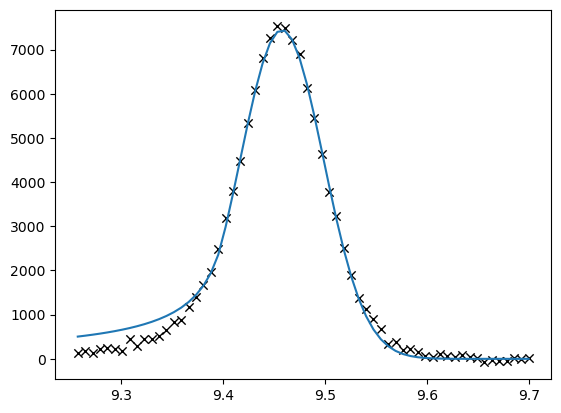

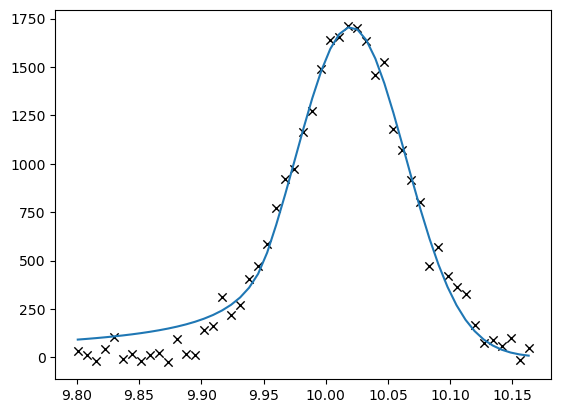

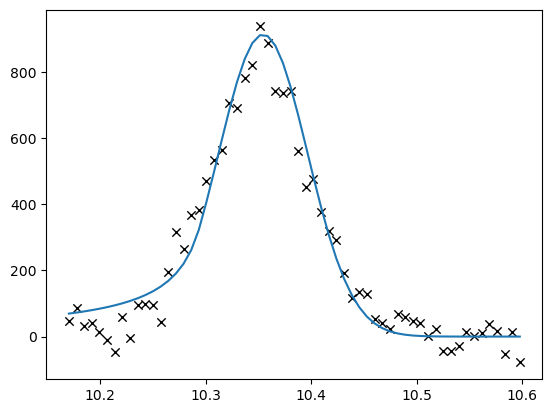

<Figure size 640x480 with 0 Axes>

In [669]:
alpha_fit_1 = cb_1.values['alpha']
n_fit_1 = cb_1.values['n']
mu_fit_1 = cb_1.values['mu']
sig_fit_1 = cb_1.values['sig']

alpha_fit_2 = cb_2.values['alpha']
n_fit_2 = cb_2.values['n']
mu_fit_2 = cb_2.values['mu']
sig_fit_2 = cb_2.values['sig']

alpha_fit_3 = cb_3.values['alpha']
n_fit_3 = cb_3.values['n']
mu_fit_3 = cb_3.values['mu']
sig_fit_3 = cb_3.values['sig']

plt.scatter(bins_1, count_1_clean, marker = 'x', color = 'k', lw = 1)
plt.plot(bins_1, crystalball(bins_1, alpha_fit_1, n_fit_1, mu_fit_1, sig_fit_1))
plt.show()
plt.clf()


plt.scatter(bins_2, count_2_clean, marker = 'x', color = 'k', lw = 1)
plt.plot(bins_2, crystalball(bins_2, alpha_fit_2, n_fit_2, mu_fit_2, sig_fit_2))
plt.show()
plt.clf()

res_sig_fit_2_free = np.sum((count_2_clean-crystalball(bins_2, alpha_fit_2, n_fit_2, mu_fit_2, sig_fit_2)) **2)

plt.scatter(bins_3, count_3_clean, marker = 'x', color = 'k', lw = 1)
plt.plot(bins_3, crystalball(bins_3, alpha_fit_3, n_fit_3, mu_fit_3, sig_fit_3))
plt.show()
plt.clf()

res_sig_fit_3_free = np.sum((count_3_clean-crystalball(bins_3, alpha_fit_3, n_fit_3, mu_fit_3, sig_fit_3)) **2)



In [670]:
cb_2_fi = Minuit(lsq_cb_2, alpha = alpha_fit_2, n = n_fit_2, mu = mu_fit_2, sig = sig_fit_1 * (mu_fit_2/mu_fit_1))
cb_2_fi.fixed['sig'] = True
cb_3_fi = Minuit(lsq_cb_3, alpha = alpha_fit_3, n = n_fit_3, mu = mu_fit_3, sig = sig_fit_1 * (mu_fit_3/mu_fit_1))
cb_3_fi.fixed['sig'] = True
# cb_3_fi = Minuit(lsq_cb_3, alpha = 1.5, n = 0.9, mu = 10.3, sig = 0.04)

In [671]:
cb_2_fi.migrad(ncall = 100, iterate = 1000)
cb_3_fi.migrad(ncall = 100, iterate = 1000)
cb_2_fi.errordef = Minuit.LIKELIHOOD
cb_3_fi.errordef = Minuit.LIKELIHOOD

/var/folders/_r/353nz1r53xxbm376n76kwspr0000gn/T/ipykernel_24359/3805273047.py:1: IMinuitWarning: errordef not set, using 1 (appropriate for least-squares)
  cb_2_fi.migrad(ncall = 100, iterate = 1000)
/var/folders/_r/353nz1r53xxbm376n76kwspr0000gn/T/ipykernel_24359/3805273047.py:2: IMinuitWarning: errordef not set, using 1 (appropriate for least-squares)
  cb_3_fi.migrad(ncall = 100, iterate = 1000)


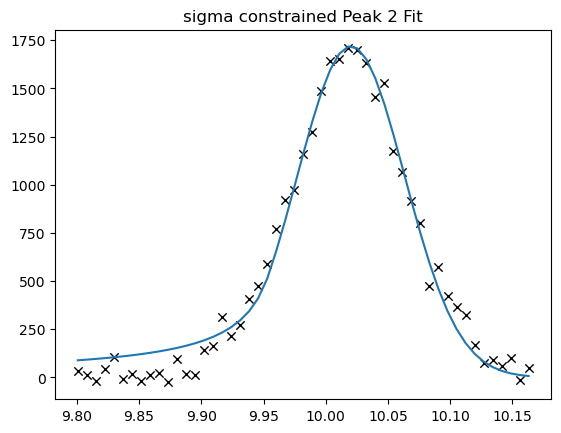

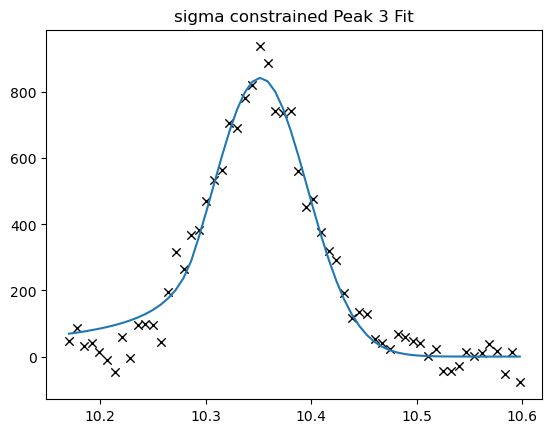

<Figure size 640x480 with 0 Axes>

In [672]:
alpha_fit_2_fi = cb_2_fi.values['alpha']
n_fit_2_fi = cb_2_fi.values['n']
mu_fit_2_fi = cb_2_fi.values['mu']
sig_fit_2_fi = cb_2_fi.values['sig']

alpha_fit_3_fi = cb_3_fi.values['alpha']
n_fit_3_fi = cb_3_fi.values['n']
mu_fit_3_fi = cb_3_fi.values['mu']
sig_fit_3_fi = cb_3_fi.values['sig']


plt.scatter(bins_2, count_2_clean, marker = 'x', color = 'k', lw = 1)
plt.plot(bins_2, crystalball(bins_2, alpha_fit_2_fi, n_fit_2_fi, mu_fit_2_fi, sig_fit_2_fi))
plt.title('sigma constrained Peak 2 Fit')
plt.show()
plt.clf()

res_sig_fit_2_con = np.sum((count_2_clean-crystalball(bins_2, alpha_fit_2_fi, n_fit_2_fi, mu_fit_2_fi, sig_fit_2_fi)) **2)

plt.scatter(bins_3, count_3_clean, marker = 'x', color = 'k', lw = 1)
plt.plot(bins_3, crystalball(bins_3, alpha_fit_3_fi, n_fit_3_fi, mu_fit_3_fi, sig_fit_3_fi))
plt.title('sigma constrained Peak 3 Fit')
plt.show()
plt.clf()

res_sig_fit_3_con = np.sum((count_3_clean-crystalball(bins_3, alpha_fit_3_fi, n_fit_3_fi, mu_fit_3_fi, sig_fit_3_fi)) **2)

Residuals for all the fits

In [673]:
print(f"{res_sig_fit_2_free = :.5}\n{res_sig_fit_3_free = :.5}\n{res_sig_fit_2_con = :.5}\n{res_sig_fit_3_con = :.5}")

res_sig_fit_2_free = 3.3081e+05
res_sig_fit_3_free = 2.1485e+05
res_sig_fit_2_con = 3.442e+05
res_sig_fit_3_con = 1.6333e+05


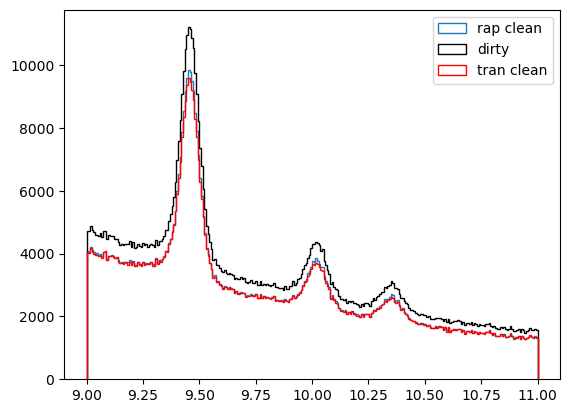

In [675]:
rap_ups = np.load('ups_anal/rap.npy')
tran_ups = np.load('ups_anal/mom_tran_pair.npy')
tran_1_ups = np.load('ups_anal/mom_tran_1.npy')
tran_2_ups = np.load('ups_anal/mom_tran_2.npy')

xmass_ups_clean_1 = xmass_ups[(rap_ups > 2) & (rap_ups < 5)]

xmass_ups_clean_2 = xmass_ups[(np.log10(tran_ups) > 0.2) & (np.log10(tran_ups) < 1.1)]

n_bins_cor = int(0.2*n_bins)

count_cl, bins_cl, patches = plt.hist(xmass_ups_clean_1, bins = n_bins_cor, histtype= 'step', label = 'rap clean')
plt.hist(xmass_ups, bins = n_bins_cor, histtype= 'step', color = 'k', label = 'dirty')
plt.hist(xmass_ups_clean_2, bins = n_bins_cor, histtype= 'step', color = 'r', label = 'tran clean')
plt.legend()

plt.show()

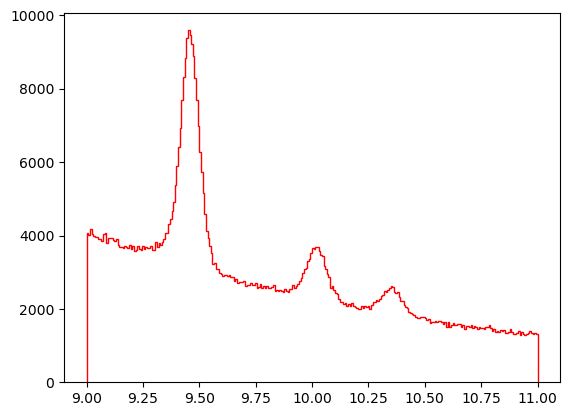

In [416]:
plt.hist(xmass_ups_clean_2, bins = n_bins_cor, histtype= 'step', color = 'r', label = 'rap_tran clean')
plt.show()

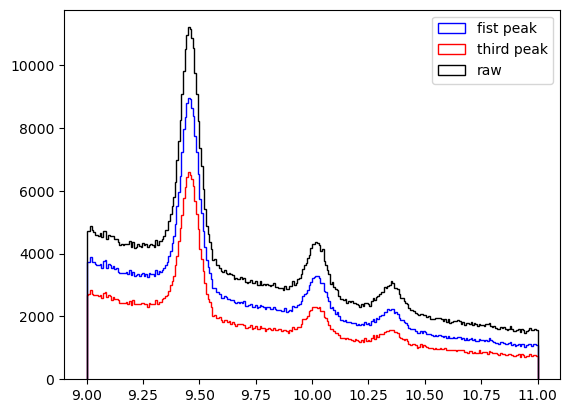

In [417]:
tran_dif = tran_2_ups - tran_1_ups

xmass_clean_3 = xmass_ups[(tran_dif > -5) & (tran_dif < 5)]
xmass_clean_4 = xmass_ups[(tran_dif > -3) & (tran_dif < 3)]

count_3, bins_3, patches_3 = plt.hist(xmass_clean_3, bins = n_bins_cor, histtype = 'step', color = 'b', label = 'fist peak', range = (9,11))

count_4, bins_4, patches_4 = plt.hist(xmass_clean_4, bins = n_bins_cor, histtype = 'step', color = 'r', label = 'third peak', range = (9,11))

count_raw, bins_raw, patches_raw = plt.hist(xmass_ups, bins = n_bins_cor, histtype= 'step', color = 'k', label = 'raw')
plt.legend()
plt.show()

bins_3 = bins_3[1:]
bins_4 = bins_4[1:]
bins_raw = bins_raw[1:]

here the third and first label to using the third or first peak as reference to purify the data. The data point taken 

In [418]:
raw_side = np.sum(count_raw[(bins_raw > 9.0) & (bins_raw < 9.25)])

first_side = np.sum(count_3[(bins_3 > 9.0) & (bins_3 < 9.25)])

third_side = np.sum(count_4[(bins_4 > 9.0) & (bins_4 < 9.25)])

raw_peak = np.sum(count_raw[(bins_raw > 9.3) & (bins_raw < 9.6)])

first_peak = np.sum(count_3[(bins_3 > 9.3) & (bins_3 < 9.6)])

third_peak = np.sum(count_4[(bins_4 > 9.3) & (bins_4 < 9.6)])

peak_rat_raw_first = raw_peak/first_peak

side_rat_raw_first = raw_side/first_side

print(f"{peak_rat_raw_first = }\n{side_rat_raw_first = }")

peak_rat_raw_third = raw_peak/third_peak

side_rat_raw_third = raw_side/third_side

print(f"{peak_rat_raw_third = }\n{side_rat_raw_third = }")

rat_raw = raw_peak/raw_side

rat_first = first_peak/first_side

print(f"{rat_raw = }\n{rat_first = }")

peak_rat_raw_first = 1.2712848129593
side_rat_raw_first = 1.2669516239230783
peak_rat_raw_third = 1.7501275366543658
side_rat_raw_third = 1.7449535809779553
rat_raw = 1.7372366941344364
rat_first = 1.7313153027045942


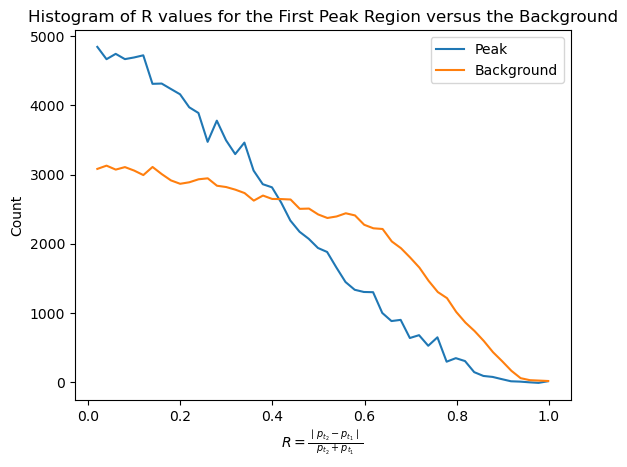

In [643]:
R = np.absolute(tran_2_ups - tran_1_ups)/(tran_2_ups + tran_1_ups)

R_side = np.concatenate((R[(xmass_ups > 9.1) & (xmass_ups < 9.2)], R[(xmass_ups > 9.7) & (xmass_ups < 9.8)]))

R_peak = R[(xmass_ups > 9.35) & (xmass_ups < 9.55)]

count_side, bins_side , patches = plt.hist(R_side, bins = 50, histtype = 'step', label = 'side', density=False)
count_peak, bins_peak, patches = plt.hist(R_peak, bins = 50, histtype = 'step', color = 'r', label = 'peak', density=False)
plt.clf()

plt.plot(bins_peak[1:], count_peak - count_side, label = 'Peak')
plt.plot(bins_side[1:], count_side, label = 'Background')
plt.ylabel('Count')
plt.xlabel(r'$ R = \frac{ \mid p_{t_2} - p_{t_1} \mid}{p_{t_2} + p_{t_1}} $')
plt.title('Histogram of R values for the First Peak Region versus the Background')
plt.legend()
plt.show()

As we want R values that are lower than the average background R values, We can take all the points that have below R=0.42, and these points are going to more likely correspond to data from the decays. Therefore the data will be cleaned. This same value of R=0.42 can be used to clean the entire dataset.

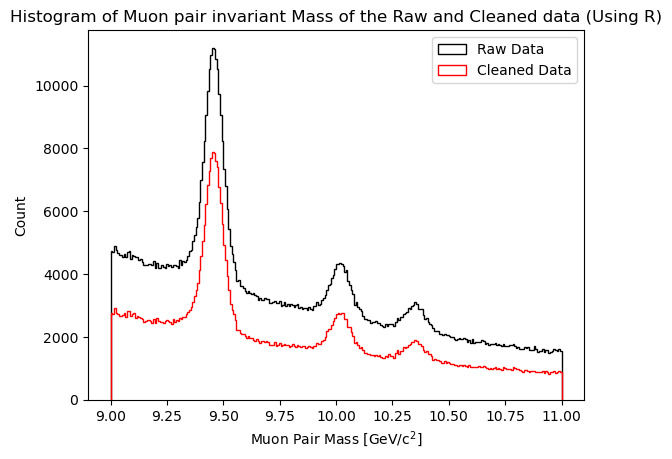

In [676]:
xmass_ups_clean = xmass_ups[R < 0.41]
count_raw, bins_raw, patches_raw = plt.hist(xmass_ups, bins = int(0.2*n_bins), histtype= 'step', color = 'k', label = 'Raw Data')
bins_raw = bins_raw[1:]

count_clean, bins_clean, _ = plt.hist(xmass_ups_clean, bins = int(0.2*n_bins), histtype = 'step', color = 'r', label = 'Cleaned Data')
bins_clean = bins_clean[1:]
plt.xlabel(r'Muon Pair Mass [GeV/c$^2$]')
plt.ylabel('Count')
plt.title('Histogram of Muon pair invariant Mass of the Raw and Cleaned data (Using R)')
plt.legend()
plt.show()

In [644]:


first_side = np.sum(count_clean[(bins_clean > 9.0) & (bins_clean < 9.25)])


raw_peak = np.sum(count_raw[(bins_raw > 9.3) & (bins_raw < 9.6)])

first_peak = np.sum(count_clean[(bins_clean > 9.3) & (bins_clean < 9.6)])

print(f"{raw_peak/first_peak = :.5}\n{raw_side/first_side = :.5}")

raw_peak/first_peak = 1.5234
raw_side/first_side = 1.7047


Start fitting the new peak to the gaussian, double gaussian and crystal ball

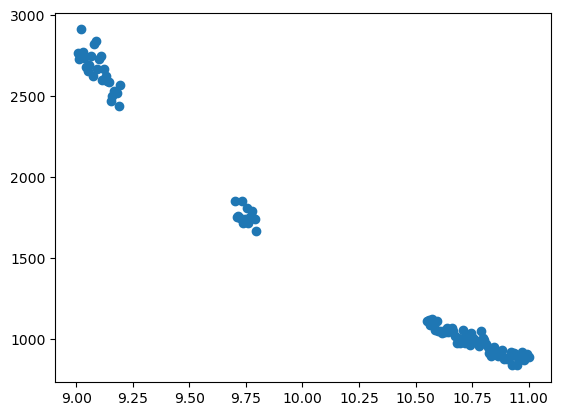

In [630]:
bins_1_cl = bins_clean[(bins_clean > 9.35) & (bins_clean < 9.6)]
count_1_cl = count_clean[(bins_clean > 9.35) & (bins_clean < 9.6)]

bins_2_cl = bins[(bins > 9.8) & (bins < 10.17)]
count_2_cl = count[(bins > 9.8) & (bins < 10.17)]

bins_3_cl = bins[(bins > 10.17) & (bins < 10.6)]
count_3_cl = count[(bins > 10.17) & (bins < 10.6)]

bins_back_cl = np.concatenate((bins_clean[(bins_clean < 9.2) | (bins_clean > 10.55)], bins_clean[(bins_clean > 9.7) & (bins_clean < 9.8)]))
count_back_cl = np.concatenate((count_clean[(bins_clean < 9.2) | (bins_clean > 10.55)], count_clean[(bins_clean > 9.7) & (bins_clean < 9.8)]))

plt.scatter(bins_back_cl, count_back_cl)
plt.show()

In [631]:
def lsq_decay_cl(a, b):
    return np.sum((count_back_cl-(decay(bins_back_cl, a,b))) **2)



In [632]:
dec_back_cl = Minuit(lsq_decay_cl, al_fit, b_fit)
dec_back_cl.errordef = Minuit.LEAST_SQUARES
dec_back_cl.migrad(ncall = 100, iterate = 1000)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.347e+05                  │              Nfcn = 63               │
│ EDM = 1.05e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  633.6e3  │   0.5e3   │            │            │         │         │       │
│ 1 │ b    │-601.83e-3 │  0.09e-3  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │  2.9e+05  -0.0478 │
│ b │  -0.0478 7.92e-09 │
└───┴───────────────────┘

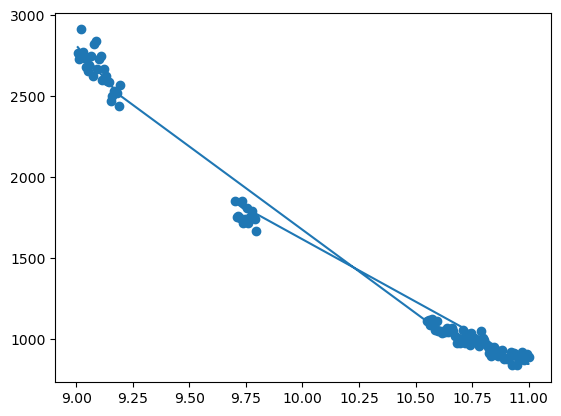

In [633]:
plt.plot(bins_back_cl, decay(bins_back_cl, dec_back_cl.values[0], dec_back_cl.values[1]))
plt.scatter(bins_back_cl, count_back_cl)
plt.show()

count_1_cl_sub = count_1_cl - decay(bins_1_cl, dec_back_cl.values[0], dec_back_cl.values[1])
count_2_cl_sub = count_2_cl - decay(bins_2_cl, dec_back_cl.values[0], dec_back_cl.values[1])
count_3_cl_sub = count_3_cl - decay(bins_3_cl, dec_back_cl.values[0], dec_back_cl.values[1])

In [634]:
# def lsq_dgauss_1_cl(alpha, n, mu, sig, a, b):
    # return np.sum((count_1_cl_sub-double_gauss(bins_1_cl,alpha, n,mu,sig)) **2)

def lsq_cb_1_cl(alpha, n, mu, sig, a, b):
    return np.sum((count_1_cl_sub-crystalball(bins_1_cl,alpha, n,mu,sig)) **2)

def lsq_cb_2_cl(alpha, n, mu, sig, a, b):
    return np.sum(count_2_cl_sub-(crystalball(bins_2_cl,alpha, n,mu,sig)) **2)

def lsq_cb_3_cl(alpha, n, mu, sig,a, b):
    return np.sum((count_3_cl_sub-(crystalball(bins_3_cl,alpha, n,mu,sig)) **2))

In [635]:
args = [1.7, 0.94, 9.45, 0.03]
cb_1_cl = Minuit(lsq_cb_1, args[0], args[1], args[2],args[3])
cb_1_cl.errordef = Minuit.LEAST_SQUARES
cb_1_cl.migrad(iterate = 10000)
cb_1_cl.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 8.154e+05                  │            Nfcn = 160204             │
│ EDM = 0.0662 (Goal: 0.0002)      │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ ABOVE EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │APPROXIMATE│NOT pos. def.│   FORCED   │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ alpha │1.65971006 │0.00000034 │            │            │         │         │       │
│ 1 │ n     │940.01747e-3│0.00005e-3 │            │            │         │         │       │
│ 2 │ mu    │ 9.4568458 │ 0.0000025 │            │            │         │         │       │
│ 3 │ sig   │41.7025e-3 │ 0.0027e-3 │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────┐
│       │     alpha         n        mu       sig │
├───────┼─────────────────────────────────────────┤
│ alpha │  1.14e-13  1.52e-14 -6.72e-15  1.18e-13 │
│     n │  1.52e-14  2.06e-15 -1.27e-15  2.25e-14 │
│    mu │ -6.72e-15 -1.27e-15   6.3e-12 -4.07e-13 │
│   sig │  1.18e-13  2.25e-14 -4.07e-13  7.36e-12 │
└───────┴─────────────────────────────────────────┘

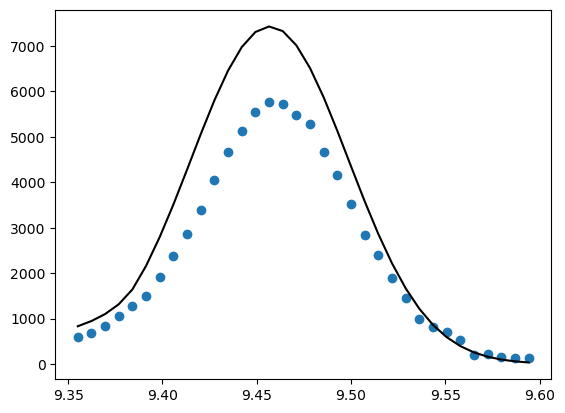

In [636]:
alpha_cl = cb_1_cl.values[0]
n_cl = cb_1_cl.values[1]
mu_cl = cb_1_cl.values[2]
sig_cl = cb_1_cl.values[3]

plt.plot(bins_1_cl, crystalball(bins_1_cl, alpha_cl, n_cl, mu_cl, sig_cl), color = 'k')
plt.scatter(bins_1_cl, count_1_cl_sub)
plt.show()

